In [52]:
from glob import glob
import os
import matplotlib.pyplot as plt
import numpy as np

In [53]:
ry2eV = 13.6
single_atom_dirs = glob(f"/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-single_atom/box*") + glob(f"/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-single_atom/spin/box*")
single_atom_dirs = glob(f"/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-single_atom/spin/box*")

In [54]:
box_and_energy = []
for path in single_atom_dirs:
    with open(os.path.join(path, "scf.out"), mode="r") as f:
        lines = [s.strip() for s in f.readlines()]
    total_energy_line = list(filter(lambda x: "!" in x, lines))
    if len(total_energy_line) == 0:
        continue
    box_length = os.path.basename(path).split("box")[-1]
    total_energy = float(total_energy_line[0].split()[-2]) * ry2eV
    box_and_energy.append([int(box_length), total_energy])
    print(f"box_length: {box_length}, total_energy: {total_energy} eV")

box_and_energy = np.array(box_and_energy)
# sort array by box length
box_and_energy = box_and_energy[box_and_energy[:, 0].argsort()]

box_length: 5, total_energy: -630.568108288 eV
box_length: 20, total_energy: -630.9721685039999 eV
box_length: 8, total_energy: -630.94849512 eV
box_length: 30, total_energy: -630.972323544 eV
box_length: 40, total_energy: -630.972428536 eV
box_length: 25, total_energy: -630.97225024 eV
box_length: 15, total_energy: -630.969426336 eV


Text(0, 0.5, 'total_energy [eV]')

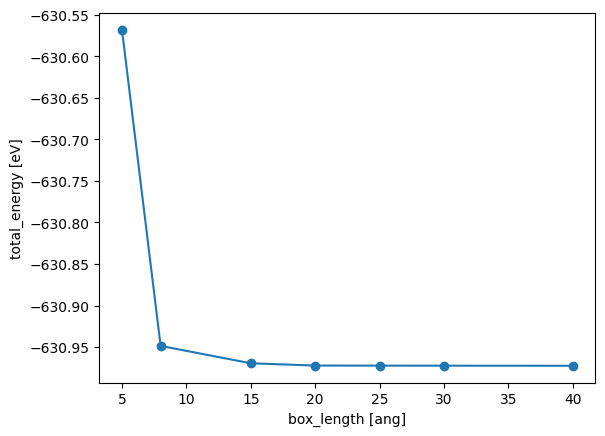

In [55]:
fig, ax = plt.subplots()
ax.plot(box_and_energy[:, 0], box_and_energy[:, 1], marker="o")
ax.set_xlabel("box_length [ang]")
ax.set_ylabel("total_energy [eV]")